In [10]:
import numpy as np
import json
import os
import pandas as pd
 
json_file = "../../results/ffs_results_recist_pancancer_union_cosmic_card_7_50.json" 
output_file = "../../data/data_processed/recist_pancancer_union_cosmic_card_7.csv"

# Fix path issues for json_file
json_file = os.path.normpath(json_file)
print(f"Using JSON file: {json_file}")

with open(json_file, "r") as f:
    ffs_results = json.load(f)

print(f"Loaded {len(ffs_results)} results from {json_file}")

# Read the melanoma batch corrected data


df_melanoma = pd.read_csv(output_file, index_col=0)

print(f"Data loaded successfully!")
print(f"Shape: {df_melanoma.shape}")
print(f"Columns: {list(df_melanoma.columns[:5])}... (showing first 5)")
print(f"Target variable (recist) distribution:")
print(df_melanoma['recist'].value_counts())
print(f"\nFirst few rows:")
print(df_melanoma.head())

columns = list(df_melanoma.columns[1:])  # Exclude 'Unnamed: 0' and 'recist'
print(columns)  # Show first 5 gene names to verify

# Check for NaN values in df_melanoma
print("="*60)
print("CHECKING FOR NaN VALUES IN df_melanoma")
print("="*60)

# Check for NaN values in the entire dataframe
total_nan = df_melanoma.isnull().sum().sum()
print(f"Total NaN values in dataframe: {total_nan}")

# Check NaN values per column
nan_per_column = df_melanoma.isnull().sum()
columns_with_nan = nan_per_column[nan_per_column > 0]

if len(columns_with_nan) > 0:
    print(f"\nColumns with NaN values:")
    for col, nan_count in columns_with_nan.items():
        print(f"  {col}: {nan_count} NaN values")
else:
    print("\nNo NaN values found in any column")

# Specifically check the target variable 'recist'
nan_in_target = df_melanoma['recist'].isnull().sum()
print(f"\nNaN values in target variable 'recist': {nan_in_target}")

# Check for infinite values
inf_values = np.isinf(df_melanoma.select_dtypes(include=[np.number])).sum().sum()
print(f"Infinite values in numeric columns: {inf_values}")

# Show data info
print(f"\nDataframe shape: {df_melanoma.shape}")
print(f"Data types:")
print(df_melanoma.dtypes.value_counts())

# Remove observations with NaN values in the target variable 'recist'
print(f"Original shape: {df_melanoma.shape}")
df_melanoma_clean = df_melanoma.dropna(subset=['recist'])
print(f"Shape after removing NaN in target: {df_melanoma_clean.shape}")
print(f"Removed {df_melanoma.shape[0] - df_melanoma_clean.shape[0]} observations with NaN in 'recist'")

# Update the dataframe
df_melanoma = df_melanoma_clean

# Verify no NaN values remain in target
print(f"NaN values in 'recist' after cleaning: {df_melanoma['recist'].isnull().sum()}")
print(f"Target distribution after cleaning:")
print(df_melanoma['recist'].value_counts())

Using JSON file: ../../results/ffs_results_recist_pancancer_union_cosmic_card_7_50.json
Loaded 50 results from ../../results/ffs_results_recist_pancancer_union_cosmic_card_7_50.json
Data loaded successfully!
Shape: (589, 2539)
Columns: ['recist', 'ENSG00000000938.13', 'ENSG00000000971.17', 'ENSG00000002549.13', 'ENSG00000002586.20']... (showing first 5)
Target variable (recist) distribution:
recist
PD    298
SD    115
PR    111
CR     65
Name: count, dtype: int64

First few rows:
               recist  ENSG00000000938.13  ENSG00000000971.17  \
Liu_Patient100     PR            3.849549            5.864285   
Liu_Patient102     SD            2.066176            4.929214   
Liu_Patient105     SD           -0.494703            2.969173   
Liu_Patient106     CR            2.412715            5.381408   
Liu_Patient107     PR           -6.011522           -5.365678   

                ENSG00000002549.13  ENSG00000002586.20  ENSG00000002587.10  \
Liu_Patient100            6.569854            

In [11]:
from collections import Counter

# Extract all selected features from all runs
all_features = []

for run_data in ffs_results.values():
    # Parse the string representation of the array
    feature_str = run_data['selected_features']
    # Remove brackets and split by whitespace
    features = feature_str.strip('[]').split()
    # Convert to integers
    features = [int(f) for f in features]
    all_features.extend(features)

# Count frequency of each feature
feature_counts = Counter(all_features)

# Get top k most frequent features
k = 10  # You can change this value
top_k_features = [feature for feature, count in feature_counts.most_common(k)]

print(f"Top {k} most frequent features:")
print(top_k_features)

# Also show the counts for reference
print(f"\nFeature frequencies:")
for feature, count in feature_counts.most_common(k):
    print(f"Feature {feature}: {count} times")



    # Map feature indices to actual gene names
    top_k_feature_names = [columns[feature] for feature in top_k_features]


    # Create a summary dataframe
    feature_summary = pd.DataFrame({
        'feature_index': top_k_features,
        'gene_name': top_k_feature_names
    })

print(f"\nSummary DataFrame:")
print(feature_summary)

print(feature_summary.to_latex(index=False))


Top 10 most frequent features:
[8, 1944, 297, 2464, 1280, 1585, 986, 1687, 1152, 772]

Feature frequencies:
Feature 8: 7 times
Feature 1944: 6 times
Feature 297: 5 times
Feature 2464: 5 times
Feature 1280: 5 times
Feature 1585: 5 times
Feature 986: 5 times
Feature 1687: 5 times
Feature 1152: 5 times
Feature 772: 4 times

Summary DataFrame:
   feature_index           gene_name
0              8  ENSG00000004468.13
1           1944   ENSG00000168917.9
2            297  ENSG00000086991.13
3           2464   ENSG00000213903.9
4           1280  ENSG00000138685.17
5           1585  ENSG00000154277.13
6            986  ENSG00000126882.13
7           1687  ENSG00000160801.14
8           1152   ENSG00000134827.8
9            772  ENSG00000115607.10
\begin{tabular}{rl}
\toprule
feature_index & gene_name \\
\midrule
8 & ENSG00000004468.13 \\
1944 & ENSG00000168917.9 \\
297 & ENSG00000086991.13 \\
2464 & ENSG00000213903.9 \\
1280 & ENSG00000138685.17 \\
1585 & ENSG00000154277.13 \\
986 & ENSG000001

Top 19 most frequent features:
[8, 1944, 297, 2464, 1280, 1585, 986, 1687, 1152, 772, 1609, 2498, 2389, 611, 645, 959, 1001, 2454, 2201]

Feature frequencies:
Feature 8: 7 times
Feature 1944: 6 times
Feature 297: 5 times
Feature 2464: 5 times
Feature 1280: 5 times
Feature 1585: 5 times
Feature 986: 5 times
Feature 1687: 5 times
Feature 1152: 5 times
Feature 772: 4 times
Feature 1609: 4 times
Feature 2498: 4 times
Feature 2389: 4 times
Feature 611: 4 times
Feature 645: 4 times
Feature 959: 4 times
Feature 1001: 4 times
Feature 2454: 4 times
Feature 2201: 4 times

Summary DataFrame:
    feature_index           gene_name
0               8  ENSG00000004468.13
1            1944   ENSG00000168917.9
2             297  ENSG00000086991.13
3            2464   ENSG00000213903.9
4            1280  ENSG00000138685.17
5            1585  ENSG00000154277.13
6             986  ENSG00000126882.13
7            1687  ENSG00000160801.14
8            1152   ENSG00000134827.8
9             772  ENSG000001156

/tmp/ipykernel_3336599/4056363209.py:106: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(test_scores, labels=[m.replace('_macro', '') for m in scoring])


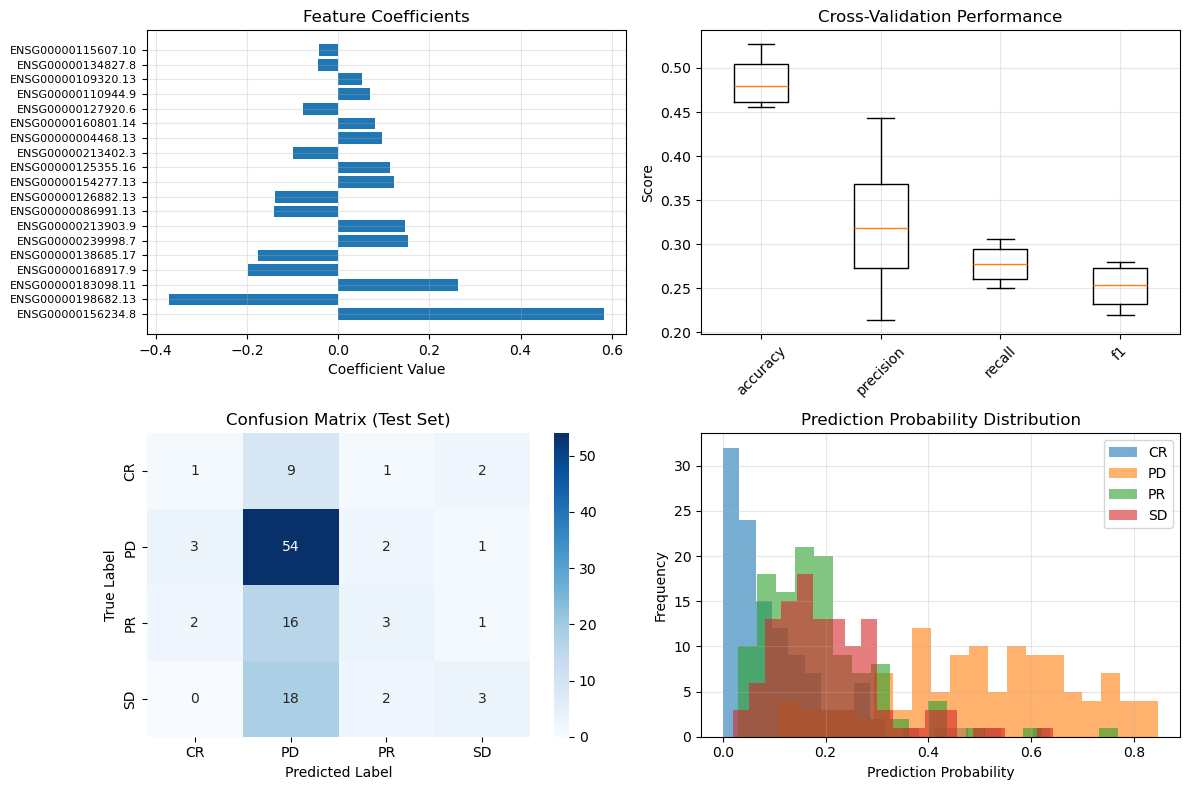

CLASSIFICATION REPORT (Single Train-Test Split)
              precision    recall  f1-score   support

          CR       0.17      0.08      0.11        13
          PD       0.56      0.90      0.69        60
          PR       0.38      0.14      0.20        22
          SD       0.43      0.13      0.20        23

    accuracy                           0.52       118
   macro avg       0.38      0.31      0.30       118
weighted avg       0.45      0.52      0.44       118

SUMMARY
Number of features used: 19
Cross-validation accuracy: 0.485 ± 0.029
Most important features (by |coefficient|):
  ENSG00000156234.8: 0.583
  ENSG00000198682.13: -0.372
  ENSG00000183098.11: 0.262


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Get top k most frequent features
k = 10  # You can change this value
for k in range(19, 20):
    top_k_features = [feature for feature, count in feature_counts.most_common(k)]

    print(f"Top {k} most frequent features:")
    print(top_k_features)

    # Also show the counts for reference
    print(f"\nFeature frequencies:")
    for feature, count in feature_counts.most_common(k):
        print(f"Feature {feature}: {count} times")



        # Map feature indices to actual gene names
        top_k_feature_names = [columns[feature] for feature in top_k_features]


        # Create a summary dataframe
        feature_summary = pd.DataFrame({
            'feature_index': top_k_features,
            'gene_name': top_k_feature_names
        })

    print(f"\nSummary DataFrame:")
    print(feature_summary)

    print(feature_summary.to_latex(index=False))

    # Extract the selected genes from feature_summary
    selected_genes = feature_summary['gene_name'].tolist()
    print(f"Selected genes for logistic regression: {selected_genes}")

    # Prepare the data
    X = df_melanoma[selected_genes].values
    y = df_melanoma['recist'].values

    print(f"Data shape: X={X.shape}, y={y.shape}")
    print(f"Target distribution: {pd.Series(y).value_counts().to_dict()}")

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Set up cross-validation
    cv = StratifiedKFold(n_splits=4, shuffle=True)

    # Create logistic regression model
    lr = LogisticRegression( max_iter=1000)

    # Perform cross-validation with multiple metrics
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    cv_results = cross_validate(lr, X_scaled, y, cv=cv, scoring=scoring, return_train_score=True)

    # Print cross-validation results
    print("="*60)
    print("CROSS-VALIDATION RESULTS")
    print("="*60)

    for metric in scoring:
        train_scores = cv_results[f'train_{metric}']
        test_scores = cv_results[f'test_{metric}']
        print(f"{metric.upper()}:")
        print(f"  Train: {train_scores.mean():.3f} ± {train_scores.std():.3f}")
        print(f"  Test:  {test_scores.mean():.3f} ± {test_scores.std():.3f}")
        print()

    # Fit final model on all data for interpretation
    lr_final = LogisticRegression(random_state=42, max_iter=1000)
    lr_final.fit(X_scaled, y)

    # Feature importance (coefficients)
    feature_importance = pd.DataFrame({
        'gene': selected_genes,
        'coefficient': lr_final.coef_[0],
        'abs_coefficient': np.abs(lr_final.coef_[0])
    }).sort_values('abs_coefficient', ascending=False)

    print("="*60)
    print("FEATURE IMPORTANCE (Logistic Regression Coefficients)")
    print("="*60)
    print(feature_importance)

    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.barh(range(len(feature_importance)), feature_importance['coefficient'])
    plt.yticks(range(len(feature_importance)), feature_importance['gene'], fontsize=8)
    plt.xlabel('Coefficient Value')
    plt.title('Feature Coefficients')
    plt.grid(True, alpha=0.3)

    # Cross-validation scores visualization
    plt.subplot(2, 2, 2)
    test_scores = [cv_results[f'test_{metric}'] for metric in scoring]
    plt.boxplot(test_scores, labels=[m.replace('_macro', '') for m in scoring])
    plt.ylabel('Score')
    plt.title('Cross-Validation Performance')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)


    # Prediction probabilities for one fold (for illustration)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
    lr_temp = LogisticRegression(random_state=42, max_iter=1000)
    lr_temp.fit(X_train, y_train)
    y_pred_proba = lr_temp.predict_proba(X_test)
    y_pred = lr_temp.predict(X_test)


    # Confusion matrix
    plt.subplot(2, 2, 3)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=lr_temp.classes_, yticklabels=lr_temp.classes_)
    plt.title('Confusion Matrix (Test Set)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # Prediction probability distribution
    plt.subplot(2, 2, 4)
    for i, class_name in enumerate(lr_temp.classes_):
        class_probs = y_pred_proba[:, i]
        plt.hist(class_probs, alpha=0.6, label=f'{class_name}', bins=20)
    plt.xlabel('Prediction Probability')
    plt.ylabel('Frequency')
    plt.title('Prediction Probability Distribution')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Detailed classification report
    print("="*60)
    print("CLASSIFICATION REPORT (Single Train-Test Split)")
    print("="*60)
    print(classification_report(y_test, y_pred))

    print("="*60)
    print("SUMMARY")
    print("="*60)
    print(f"Number of features used: {len(selected_genes)}")
    print(f"Cross-validation accuracy: {cv_results['test_accuracy'].mean():.3f} ± {cv_results['test_accuracy'].std():.3f}")
    print(f"Most important features (by |coefficient|):")
    for i, row in feature_importance.head(3).iterrows():
        print(f"  {row['gene']}: {row['coefficient']:.3f}")